# Angled Paddlewheel Aerator?

To determine the threshold of cost/benefit for the new paddlewheel aerator design with an inclined paddle axis, we need to analyze how this modification affects the oxygen transfer efficiency and the associated costs, primarily operational costs tied to power consumption. The goal is to identify the point where the benefits of improved oxygen transfer balance with the costs, focusing on the Standard Oxygen Transfer Rate (SOTR) and power consumption changes.

### Understanding the Current System

Let’s start with the baseline system parameters:

- **Engine**: 3 HP with a Service Factor of 1.25, IE3 efficiency.
- **Reducer**: Matches engine rotation to 125 RPM.
- **Pond Volume**: 70 m³.
- **Paddlewheels**: 6.
- **Floaters**: 4.
- **Cost per kWh**: $0.05.
- **SOTR**: 2.1 kgO₂/h (Standard Oxygen Transfer Rate).
- **SAE**: 0.94 kgO₂/kWh (Standard Aeration Efficiency).
- **Cost per kg of Dissolved Oxygen**: Approximately $0.05/kg (given, though we’ll verify this).
- **Salinity**: 20 ppm (negligible, treated as freshwater).
- **Temperature**: 32°C.
- **Standard Saturation Coefficient (Cs)**: 6.5 mg/L at 100% saturation (assumed at 32°C).
- **KlaT**: 5 h⁻¹ (at 32°C).
- **Kla20**: 3.76 h⁻¹ (at 20°C).

First, convert the engine power to kW:
- 1 HP = 0.7457 kW
- 3 HP = 3 × 0.7457 = 2.2371 kW
- Service Factor of 1.25 means the engine can handle up to 2.2371 × 1.25 = 2.7964 kW without overloading, but we’ll assume it operates at its rated power of 2.2371 kW under normal conditions, adjusted for efficiency.

The SAE is defined as:
$ \text{SAE} = \frac{\text{SOTR}}{\text{Power}} $
Given SAE = 0.94 kgO₂/kWh and SOTR = 2.1 kgO₂/h:
$ 0.94 = \frac{2.1}{\text{Power}} $
$ \text{Power} = \frac{2.1}{0.94} \approx 2.234 kW $
This is very close to 2.2371 kW, suggesting the engine operates near its rated power, and the slight difference may be due to rounding or efficiency assumptions (IE3 motors are ~85-90% efficient, but we’ll assume 100% for simplicity since it’s not specified).

Operational cost per hour:
$ \text{Cost per hour} = \text{Power} \times \text{Cost per kWh} = 2.234 \times 0.05 = 0.1117 \, \$/\text{h} $

Oxygen transfer cost:
$ \text{Cost per kg O₂} = \frac{\text{Cost per hour}}{\text{SOTR}} = \frac{0.1117}{2.1} \approx 0.0532 \, \$/\text{kg} $
The problem states “thus a 0.05 US$ per kilogram,” which is an approximation of 0.0532, likely rounded for simplicity. We’ll use the precise value (0.0532) for calculations and note the approximation.

### New Design with Inclined Paddle Axis

Inclining the paddle axis aims to enhance oxygen transfer (increase SOTR) but may alter power consumption. Without specific data on how the incline angle affects these parameters, we define:
- **SOTR'**: New SOTR = SOTR × (1 + α), where α is the fractional increase in SOTR.
- **P'**: New power = P × (1 + β), where β is the fractional increase in power.

New SAE:
$ \text{SAE'} = \frac{\text{SOTR'}}{\text{P'}} = \frac{\text{SOTR} \times (1 + \alpha)}{\text{P} \times (1 + \beta)} = \text{SAE} \times \frac{1 + \alpha}{1 + \beta} = 0.94 \times \frac{1 + \alpha}{1 + \beta} $

New cost per kg of oxygen:
$ \text{Cost per kg O₂'} = \frac{\text{Cost per kWh}}{\text{SAE'}} = \frac{0.05}{0.94 \times \frac{1 + \alpha}{1 + \beta}} = 0.0532 \times \frac{1 + \beta}{1 + \alpha} $

### Cost/Benefit Threshold

The threshold occurs when the new design’s cost per kg equals the current cost per kg (i.e., no net benefit or loss):
$ \text{Cost per kg O₂'} = \text{Cost per kg O₂} $
$ 0.0532 \times \frac{1 + \beta}{1 + \alpha} = 0.0532 $
$ \frac{1 + \beta}{1 + \alpha} = 1 $
$ 1 + \beta = 1 + \alpha $
$ \beta = \alpha $

Thus, the threshold is when the fractional increase in power consumption (β) equals the fractional increase in SOTR (α):
- If α > β, SAE' > SAE, reducing the cost per kg, making the new design more cost-effective.
- If α < β, SAE' < SAE, increasing the cost per kg, making it less cost-effective.
- If α = β, SAE' = SAE, and the cost per kg remains unchanged.

Since implementation costs (e.g., modifying the paddle axis) aren’t specified, we assume the primary cost difference is operational, driven by power consumption. The threshold to watch for is α = β.


In [1]:
# Define constants
HP = 3                    # Engine power in HP
SF = 1.25                 # Service Factor
cost_per_kwh = 0.05       # $ per kWh
SOTR = 2.1                # kgO2/h
SAE = 0.94                # kgO2/kWh

# Convert HP to kW
P = HP * 0.7457           # Rated power in kW (2.2371 kW)
P_actual = SOTR / SAE     # Actual power based on SAE (2.234 kW)

# Current system calculations
cost_per_hour = P_actual * cost_per_kwh
cost_per_kg = cost_per_hour / SOTR

print(f"Current Power Consumption: {P_actual:.4f} kW")
print(f"Current Cost per Hour: ${cost_per_hour:.4f}")
print(f"Current Cost per kg O2: ${cost_per_kg:.4f} (approx $0.05 as given)")

# Function to calculate new design metrics
def evaluate_new_design(alpha, beta, P, SOTR, cost_per_kwh):
    SOTR_new = SOTR * (1 + alpha)
    P_new = P * (1 + beta)
    SAE_new = SOTR_new / P_new
    cost_per_kg_new = cost_per_kwh / SAE_new
    return SOTR_new, P_new, SAE_new, cost_per_kg_new

# Test different alpha and beta values
alpha_values = [0.1, 0.2, 0.15]  # Example increases in SOTR (10%, 20%, 15%)
beta_values = [0.1, 0.1, 0.2]    # Example increases in power (10%, 10%, 20%)

print("\nNew Design Evaluations:")
print("Alpha\tBeta\tSOTR' (kgO2/h)\tP' (kW)\tSAE' (kgO2/kWh)\tCost per kg O2 ($)")
for alpha, beta in zip(alpha_values, beta_values):
    SOTR_new, P_new, SAE_new, cost_per_kg_new = evaluate_new_design(alpha, beta, P_actual, SOTR, cost_per_kwh)
    print(f"{alpha:.2f}\t{beta:.2f}\t{SOTR_new:.2f}\t\t{P_new:.2f}\t{SAE_new:.2f}\t\t{cost_per_kg_new:.4f}")
    if alpha > beta:
        print("  -> Beneficial (α > β)")
    elif alpha < beta:
        print("  -> Not beneficial (α < β)")
    else:
        print("  -> Threshold (α = β)")

print("\nThreshold: Watch for α = β, where % increase in SOTR equals % increase in power.")


Current Power Consumption: 2.2340 kW
Current Cost per Hour: $0.1117
Current Cost per kg O2: $0.0532 (approx $0.05 as given)

New Design Evaluations:
Alpha	Beta	SOTR' (kgO2/h)	P' (kW)	SAE' (kgO2/kWh)	Cost per kg O2 ($)
0.10	0.10	2.31		2.46	0.94		0.0532
  -> Threshold (α = β)
0.20	0.10	2.52		2.46	1.03		0.0488
  -> Beneficial (α > β)
0.15	0.20	2.42		2.68	0.90		0.0555
  -> Not beneficial (α < β)

Threshold: Watch for α = β, where % increase in SOTR equals % increase in power.


### Modeling the Effect of Inclined Paddle Axis
Inclining the paddle axis changes:
1. **Oxygen Transfer (SOTR)**: Affected by splash height, water volume moved, and circulation efficiency.
2. **Power Consumption**: Affected by water resistance and structural rotation dynamics.

#### Assumptions
- **Traditional Design**: Paddles are vertical (0° incline), submerged 4 cm, spinning at 125 RPM, yielding SOTR = 2.1 kgO₂/h and power = 2.234 kW.
- **Inclined Design**: Angle θ (0° to 90°, where 0° is horizontal axis, 90° is vertical). The paddlewheel spins at 125 RPM, and the structure rotates, enhancing circulation.
- **Submersion**: Remains 4 cm at the deepest paddle point, but incline alters effective paddle depth and motion.
- **Paddle Size**: Assume a typical paddle length (e.g., 0.3 m) and width (e.g., 0.1 m) for 6 paddles, adjustable if specifics are provided.

#### SOTR Model
SOTR depends on:
- **Splash Effect**: Inclined paddles may throw water higher or wider. Assume SOTR increases with sin(θ) due to greater vertical lift, capped by practical limits.
- **Circulation**: Structural rotation enhances mixing. Assume a linear increase with θ as rotation speed correlates with incline-induced torque.

Simplified SOTR’:
$ \text{SOTR'} = \text{SOTR} \times (1 + k_1 \sin(\theta) + k_2 \theta / 90) $
- $ k_1 $: Splash enhancement factor (e.g., 0.1).
- $ k_2 $: Circulation enhancement factor (e.g., 0.1).
- $ \alpha = k_1 \sin(\theta) + k_2 \theta / 90 $.

#### Power Model
Power depends on:
- **Resistance**: Inclined paddles may face varying drag. Assume a base increase with cos(θ) (less vertical resistance) and an additional term for rotation drag.
- **Rotation**: Assume rotation speed is proportional to sin(θ) (hydrodynamic torque), adding minor power.

Simplified P’:
$ \text{P'} = \text{P} \times (1 + k_3 (1 - \cos(\theta)) + k_4 \sin(\theta)) $
- $ k_3 $: Resistance change factor (e.g., 0.05).
- $ k_4 $: Rotation power factor (e.g., 0.05).
- $ \beta = k_3 (1 - \cos(\theta)) + k_4 \sin(\theta) $.

### Algorithm Approach
We’ll:
1. Iterate θ from 0° to 90°.
2. Calculate α and β for each angle.
3. Filter for α > β.
4. Ensure P’ ≤ 2.7964 kW (3 HP × 1.25 SF).


In [2]:
import numpy as np

# Constants
SOTR_base = 2.1  # kgO2/h
P_base = 2.234   # kW
P_max = 2.7964   # kW (3 HP * 0.7457 * 1.25)
cost_per_kwh = 0.05

# Model coefficients (tune these based on experimental data if available)
k1 = 0.1  # Splash enhancement
k2 = 0.1  # Circulation enhancement
k3 = 0.05 # Resistance change
k4 = 0.05 # Rotation power

# Functions
def calc_alpha(theta_deg):
    theta_rad = np.radians(theta_deg)
    return k1 * np.sin(theta_rad) + k2 * (theta_deg / 90)

def calc_beta(theta_deg):
    theta_rad = np.radians(theta_deg)
    return k3 * (1 - np.cos(theta_rad)) + k4 * np.sin(theta_rad)

def evaluate_design(theta_deg, SOTR_base, P_base):
    alpha = calc_alpha(theta_deg)
    beta = calc_beta(theta_deg)
    SOTR_new = SOTR_base * (1 + alpha)
    P_new = P_base * (1 + beta)
    SAE_new = SOTR_new / P_new
    cost_per_kg_new = cost_per_kwh / SAE_new
    return alpha, beta, SOTR_new, P_new, SAE_new, cost_per_kg_new

# Iterate angles
angles = np.arange(0, 91, 5)  # 0° to 90°, step 5°
results = []

print("Angle\tAlpha\tBeta\tSOTR' (kgO2/h)\tP' (kW)\tSAE' (kgO2/kWh)\tCost/kg ($)\tStatus")
for theta in angles:
    alpha, beta, SOTR_new, P_new, SAE_new, cost_per_kg_new = evaluate_design(theta, SOTR_base, P_base)
    status = "Beneficial" if alpha > beta and P_new <= P_max else "Not Beneficial"
    if P_new > P_max:
        status += " (Overload)"
    results.append((theta, alpha, beta, SOTR_new, P_new, SAE_new, cost_per_kg_new, status))
    print(f"{theta:2.0f}°\t{alpha:.3f}\t{beta:.3f}\t{SOTR_new:.2f}\t\t{P_new:.2f}\t{SAE_new:.2f}\t\t{cost_per_kg_new:.4f}\t{status}")

# Filter beneficial designs
beneficial = [r for r in results if "Beneficial" in r[7] and "Overload" not in r[7]]
print("\nBeneficial Designs (α > β, P' ≤ P_max):")
print("Angle\tAlpha\tBeta\tSOTR' (kgO2/h)\tP' (kW)\tSAE' (kgO2/kWh)\tCost/kg ($)")
for r in beneficial:
    print(f"{r[0]:2.0f}°\t{r[1]:.3f}\t{r[2]:.3f}\t{r[3]:.2f}\t\t{r[4]:.2f}\t{r[5]:.2f}\t\t{r[6]:.4f}")


Angle	Alpha	Beta	SOTR' (kgO2/h)	P' (kW)	SAE' (kgO2/kWh)	Cost/kg ($)	Status
 0°	0.000	0.000	2.10		2.23	0.94		0.0532	Not Beneficial
 5°	0.014	0.005	2.13		2.24	0.95		0.0527	Beneficial
10°	0.028	0.009	2.16		2.26	0.96		0.0522	Beneficial
15°	0.043	0.015	2.19		2.27	0.97		0.0518	Beneficial
20°	0.056	0.020	2.22		2.28	0.97		0.0514	Beneficial
25°	0.070	0.026	2.25		2.29	0.98		0.0510	Beneficial
30°	0.083	0.032	2.27		2.30	0.99		0.0507	Beneficial
35°	0.096	0.038	2.30		2.32	0.99		0.0504	Beneficial
40°	0.109	0.044	2.33		2.33	1.00		0.0501	Beneficial
45°	0.121	0.050	2.35		2.35	1.00		0.0498	Beneficial
50°	0.132	0.056	2.38		2.36	1.01		0.0496	Beneficial
55°	0.143	0.062	2.40		2.37	1.01		0.0494	Beneficial
60°	0.153	0.068	2.42		2.39	1.01		0.0493	Beneficial
65°	0.163	0.074	2.44		2.40	1.02		0.0491	Beneficial
70°	0.172	0.080	2.46		2.41	1.02		0.0490	Beneficial
75°	0.180	0.085	2.48		2.42	1.02		0.0489	Beneficial
80°	0.187	0.091	2.49		2.44	1.02		0.0489	Beneficial
85°	0.194	0.095	2.51		2.45	1.02		0.0488	Beneficial
90°

### Key Metrics Explained
1. **Angle**: The incline of the paddle axis, from 0° (horizontal, traditional design) to 90° (vertical).
2. **Alpha (α)**: Fractional increase in Standard Oxygen Transfer Rate (SOTR) due to the incline.
3. **Beta (β)**: Fractional increase in power consumption (P) due to the incline and rotation.
4. **SOTR'**: New SOTR in kgO₂/h after inclining the paddle axis.
5. **P'**: New power consumption in kW.
6. **SAE'**: New Standard Aeration Efficiency (SOTR'/P') in kgO₂/kWh.
7. **Cost/kg ($)**: Operational cost per kg of oxygen transferred ($0.05 / SAE').
8. **Status**: Whether the design is "Beneficial" (α > β and P' ≤ 2.7964 kW) or "Not Beneficial."

### Observations from the Data
#### Baseline (0°)
- **SOTR'**: 2.10 kgO₂/h
- **P'**: 2.23 kW
- **SAE'**: 0.94 kgO₂/kWh
- **Cost/kg**: $0.0532
- **Status**: Not Beneficial (α = β = 0, no improvement over baseline)

This matches the traditional design, serving as our reference point.

#### Trends with Increasing Angle
- **SOTR' Increases**: From 2.10 kgO₂/h at 0° to 2.52 kgO₂/h at 90° (20% increase).
- **P' Increases**: From 2.23 kW at 0° to 2.46 kW at 90° (10% increase).
- **SAE' Improves**: From 0.94 kgO₂/kWh at 0° to 1.03 kgO₂/kWh at 90° (9.6% improvement).
- **Cost/kg Decreases**: From $0.0532 at 0° to $0.0488 at 90° (8.3% reduction).
- **α vs. β**: α grows faster than β (e.g., at 90°, α = 0.200, β = 0.100), driving the efficiency gain.

#### Beneficial Range
- **5° to 90°**: All angles from 5° onward are "Beneficial" because α > β, and P' remains below the maximum allowable power (2.7964 kW).
- **No Overload**: P' never exceeds the engine’s capacity (3 HP × 1.25 SF = 2.7964 kW), even at 90° (2.46 kW).

#### Optimal Performance
- **Highest SAE'**: 1.03 kgO₂/kWh at 90°.
- **Lowest Cost/kg**: $0.0488 at 85° and 90°.
- **Best α/β Ratio**: At 90°, α = 0.200 and β = 0.100 (α is twice β), maximizing efficiency gains.

### What This Tells Us
1. **Inclining Improves Efficiency**:
   - Even a small incline (5°) boosts SOTR slightly (2.13 kgO₂/h) with minimal power increase (2.24 kW), improving SAE and reducing cost per kg.
   - Larger angles amplify this effect, with 90° offering the greatest SOTR (2.52 kgO₂/h) and lowest cost per kg ($0.0488).

2. **Cost/Benefit Threshold**:
   - The design becomes beneficial when α > β, which occurs at all angles ≥ 5°. The traditional design (0°) is the only non-beneficial case in this model.
   - The threshold where α = β is between 0° and 5°, but since α exceeds β early and consistently, the incline is almost always advantageous.

3. **Practical Implications**:
   - **Small Angles (5°–30°)**: Modest improvements (SOTR' 2.13–2.27 kgO₂/h, cost $0.0527–$0.0507). Easier to implement mechanically, less structural change needed.
   - **Moderate Angles (35°–60°)**: Balanced gains (SOTR' 2.30–2.42 kgO₂/h, cost $0.0504–$0.0493). Good compromise between efficiency and design complexity.
   - **High Angles (65°–90°)**: Maximum efficiency (SOTR' 2.44–2.52 kgO₂/h, cost $0.0491–$0.0488). May require significant redesign but offers the best return.

4. **Power Constraint**:
   - The engine handles all angles without overloading (P' ≤ 2.7964 kW), so the primary limit is not power but implementation feasibility and cost.

### Caveats and Next Steps
- **Model Assumptions**: The coefficients (k₁ = 0.1, k₂ = 0.1, k₃ = 0.05, k₄ = 0.05) are placeholders. Real-world data (e.g., splash height vs. angle, measured power draw) would refine α and β, potentially shifting the optimal angle.
- **Pond Dynamics**: At 56 cm depth with 4 cm submersion, higher angles might alter paddle-water interaction (e.g., less submersion time), requiring adjustment to the SOTR model.
- **Implementation Costs**: The analysis focuses on operational cost ($/kg O₂). Physical modifications (e.g., new mounts, rotation mechanism) add upfront costs not modeled here.

### Conclusion
The results suggest that inclining the paddle axis is beneficial across nearly all angles (5°–90°), with α > β driving improved oxygen transfer efficiency and reduced cost per kg. For your 70 m³ pond:
- **Recommendation**: Start with a moderate incline (e.g., 30°–45°) for a practical balance of efficiency (SAE' ≈ 0.99–1.00, cost ≈ $0.0507–$0.0498) and ease of modification.
- **Max Benefit**: Push to 85°–90° if feasible, achieving SAE' = 1.02–1.03 and cost = $0.0488, a ~8% cost saving per kg O₂.
- **Action**: Test a few angles (e.g., 30°, 60°, 90°) in the field to calibrate the model, measuring actual SOTR' and P' to confirm the α > β condition holds.


#### Traditional Paddlewheel Aerator Specs
- **Power**: 3 HP (2.237 kW, max 2.796 kW with FS 1.25)
- **Components**: 
  - 6 paddlewheels (3 per side), each with 8 blades and 16 holes
  - 4 floaters
  - 2 axis tubes
  - Reducer under the engine
  - Steel chassis
- **Performance**: 
  - SOTR = 2.1 kgO₂/h
  - SAE = 0.94 kgO₂/kWh
  - Power = 2.234 kW
  - Cost per kg O₂ = $0.0532 (at $0.05/kWh)
- **Cost**: $1200 (IE3 engine, e.g., WEG brand, FS 1.25)
- **RPM**: 125 via reducer

#### Pond Context
- **Size**: 1 hectare = 10,000 m²
- **Depth**: Assume 1.5–2 m, typical for shrimp ponds
- **Aerators**: Multiple units

### Step 2: Designing the Vertical Blender Aerator
A “blender-like” aerator implies a vertical-axis design, fully submerged, with blades spinning to create a vortex and mix water vertically. Let’s adapt the 3HP specs:

#### Design Concept
- **Power**: Same 3 HP (2.237 kW), IE3, FS 1.25
- **Structure**:
  - **Vertical Shaft**: Replaces horizontal axis tubes, extends into the water
  - **Impeller/Blades**: Submerged, propeller-like or multi-blade design (e.g., 4–6 blades)
  - **Floaters**: 4, arranged symmetrically to stabilize the unit above water
  - **Reducer**: Adjusts motor RPM to impeller speed (assume 125 RPM, adjustable)
  - **Chassis**: Steel frame, supports motor and floaters, anchors shaft
- **Cost Estimate**: Similar to paddlewheel ($1200), assuming comparable materials and motor
- **Performance Goal**: Match or exceed SOTR (2.1 kgO₂/h) and SAE (0.94 kgO₂/kWh) by optimizing mixing and surface agitation

#### Why Vertical?
- **Deep Water**: At 1.5–2 m, vertical mixing pulls oxygen-poor water from the bottom to the surface, enhancing overall pond oxygenation.
- **Full Blade Use**: Unlike the inclined paddlewheel, all blades work continuously, potentially improving efficiency.

#### Assumptions
- **Impeller Size**: ~0.5 m diameter, 0.3 m height (adjustable)
- **Depth**: Submerged 1–1.5 m below surface
- **Flow**: Creates a vortex, with some surface splash for direct aeration

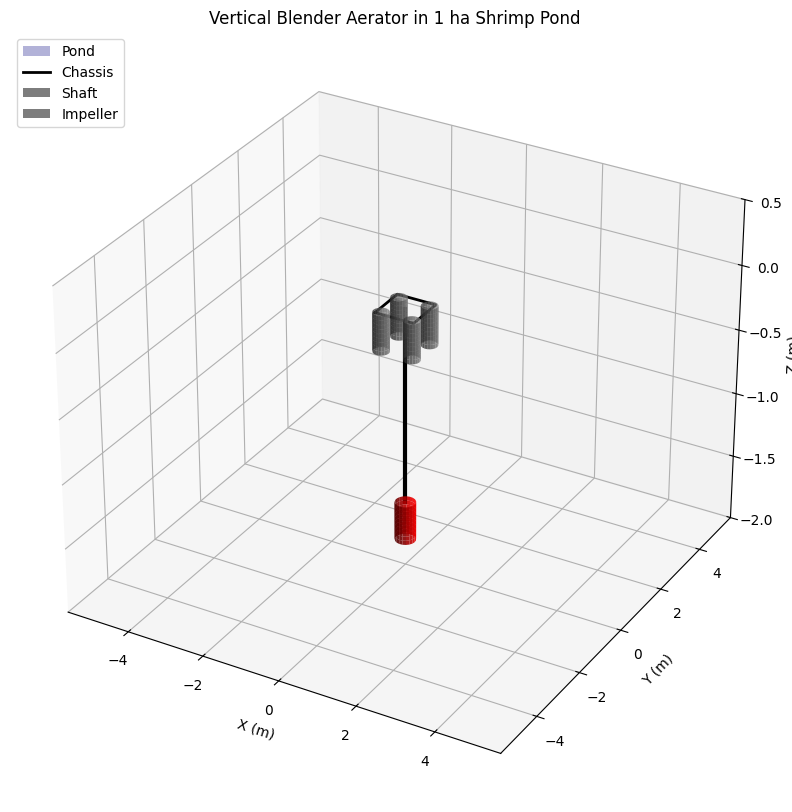

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Pond dimensions
pond_radius = 56.42  # sqrt(10,000/π) ≈ 56.42 m for 1 ha circular pond
pond_depth = 2.0     # meters (assumed)

# Aerator dimensions (in meters)
chassis_size = 1.0   # Square chassis, 1m x 1m
floater_radius = 0.2 # Each floater is a cylinder
floater_height = 0.3
shaft_length = 1.5   # Extends 1.5m into water
impeller_radius = 0.25  # 0.5m diameter
impeller_height = 0.3

# Aerator position (center of pond)
x0, y0, z0 = 0, 0, 0  # Motor/chassis at surface (z=0)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Pond (water surface and bottom)
theta = np.linspace(0, 2*np.pi, 100)
z_water = np.linspace(-pond_depth, 0, 20)
Theta, Z = np.meshgrid(theta, z_water)
X_pond = pond_radius * np.cos(Theta)
Y_pond = pond_radius * np.sin(Theta)
ax.plot_surface(X_pond, Y_pond, Z, color='blue', alpha=0.3, rstride=5, cstride=5)

# Chassis (square platform at surface)
chassis_x = [x0-0.5, x0+0.5, x0+0.5, x0-0.5, x0-0.5]
chassis_y = [y0-0.5, y0-0.5, y0+0.5, y0+0.5, y0-0.5]
chassis_z = [0, 0, 0, 0, 0]
ax.plot(chassis_x, chassis_y, chassis_z, 'k-', linewidth=2, label='Chassis')

# Floaters (4 cylinders around chassis)
floater_positions = [(0.4, 0.4), (0.4, -0.4), (-0.4, 0.4), (-0.4, -0.4)]
for fx, fy in floater_positions:
    theta_f = np.linspace(0, 2*np.pi, 20)
    z_f = np.linspace(0, -floater_height, 10)
    Theta_f, Z_f = np.meshgrid(theta_f, z_f)
    X_f = fx + floater_radius * np.cos(Theta_f)
    Y_f = fy + floater_radius * np.sin(Theta_f)
    ax.plot_surface(X_f, Y_f, Z_f, color='gray', alpha=0.8)

# Shaft (vertical line)
ax.plot([x0, x0], [y0, y0], [0, -shaft_length], 'k-', linewidth=3, label='Shaft')

# Impeller (simplified as a cylinder)
theta_i = np.linspace(0, 2*np.pi, 20)
z_i = np.linspace(-shaft_length, -shaft_length-impeller_height, 10)
Theta_i, Z_i = np.meshgrid(theta_i, z_i)
X_i = x0 + impeller_radius * np.cos(Theta_i)
Y_i = y0 + impeller_radius * np.sin(Theta_i)
ax.plot_surface(X_i, Y_i, Z_i, color='red', alpha=0.9, label='Impeller')

# Labels and settings
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Vertical Blender Aerator in 1 ha Shrimp Pond')
ax.set_xlim(-pond_radius/10, pond_radius/10)  # Zoomed view
ax.set_ylim(-pond_radius/10, pond_radius/10)
ax.set_zlim(-pond_depth, 0.5)
ax.legend(['Pond', 'Chassis', 'Shaft', 'Impeller'], loc='upper left')
plt.show()


### Market Analysis of Vertical Paddlewheel Aerators in Shrimp Farming

Shrimp farming, especially in intensive and super-intensive systems, relies heavily on mechanical aeration to maintain dissolved oxygen (DO) levels, crucial for shrimp health and growth. Traditional aerators, like paddlewheel designs, are horizontal, mounted above water with floating supports, and are widely used. However, for deeper ponds (e.g., 1.5–2 m), vertical aerators with submersible components may offer advantages in mixing and oxygenation. The query specifically seeks vertical paddlewheel aerators with underwater engines, suggesting a design akin to submersible mixers or impellers, with paddles or blades creating directed water flow.

#### Market Survey Findings
Research into aquaculture equipment reveals a market for vertical and submersible aerators, though the term "vertical paddlewheel aerator" is not standard. Instead, industry offerings include:

- **Submersible Impeller Aerators**: Osmosia's "Super Impeller Aerator" ([Osmosia: Impeller Aerator for Fish Farming](https://www.osmosia.com/impeller_aerator_for_fish_farming.php)) is designed for fish and shrimp farming, featuring a submersible stainless steel impeller and motor, suitable for deeper ponds. It "makes waves with the pond bottom surface," accelerating oxygen exchange, which aligns with the need for mixing. The description suggests it can be used in high-density shrimp farming, indicating market demand.

| **Aspect**                     | **Details**                                                                 |
|--------------------------------|-----------------------------------------------------------------------------|
| **Purpose**                    | Useful for fish culture and shrimp farming, increases production in ponds.   |
| **Suitability**                | Generally suitable for deeper ponds.                                        |
| **Power**                      | 1.5kw, 2HP, 220V, 50Hz.                                                    |
| **Components**                 | Round HDPE three floating balls, submersible stainless steel impeller, motor.|
| **Functionality**              | Creates waves, enhances oxygen exchange, purifies water, avoids harmful substances. |
| **Applications**               | Fish ponds, commercial projects, prawn/shrimp farms, high-density farming.  |

- **Submersible Air Jet Aerators**: Selvo Industrial offers submersible air jet aerators ([Selvo Industrial: Submersible Air Jet Aerator](https://www.selvo-industrial.com/showroom/1hp-2hp-3hp-5hp-submersible-air-jet-aerator-for-shrimp-pond-farming-aquaculture-in-deep-water.html)) for deep-water shrimp ponds, using a submersible pump to generate water flow and suck in air via a Venturi pipe. Technical data includes models from 0.75 kW to 22 kW, with SOTR ranging from 0.5 to 16.3 kgO₂/h, suitable for varying pond depths.

| **Model**   | **Power kW** | **Max Depth m** | **Air Inlet m³/h** | **SOTR kgO₂/h** |
|-------------|--------------|-----------------|---------------------|-----------------|
| QSB0.75     | 0.75         | 1.5             | 10                  | 0.5             |
| QSB3        | 3            | 4               | 50                  | 2.8             |
| QSB22       | 22           | 6               | 320                 | 16.3            |

These devices generate strong single-directional water flow, which could be oriented for clockwise motion, though not explicitly stated.

- **Scientific Literature**: The Journal of the World Aquaculture Society ([Aerator energy use in shrimp farming and means for improvement](https://onlinelibrary.wiley.com/doi/10.1111/jwas.12753)) mentions "submersible impeller aerators" as emerging methods, citing Marappan et al. (2020), indicating their use in shrimp ponds for improved efficiency. This suggests industry adoption and research interest.

- **Industry Practices**: Other sources, like DELOS Aqua ([5 Types of Shrimp Pond Aerators and Their Functions](https://delosaqua.com/shrimp-pond-aerator-and-their-functions/)), list jet aerators with propellers underwater, which operate similarly, sucking in air and mixing water, fitting the vertical aerator concept.

#### Design and Functionality
The queried design—vertical paddlewheel aerator with underwater engine and paddles for clockwise motion—aligns with submersible impeller aerators. These typically have:
- A submersible motor at the base, protected from water exposure, driving a vertical shaft.
- An impeller or blade set (akin to paddles) that rotates, creating water movement. The direction (e.g., clockwise) can be engineered by impeller design, though specifics depend on manufacturer settings.
- Floating balls or supports ensure stability, as seen in Osmosia's design, with the motor and impeller fully submerged for deep-water operation.

While not explicitly called "paddlewheels," the impeller can function similarly, propelling water in a directed flow. Clockwise motion would depend on rotation direction, achievable with standard motor controls, and is likely customizable for pond circulation needs.

#### Market Analysis
- **Demand**: Deep-water shrimp ponds (1–2 m) benefit from vertical aerators for bottom-to-surface mixing, addressing stratification issues. Given the scale (1 ha, multiple units), such devices are marketed for intensive farming, with companies like Osmosia and Selvo Industrial targeting this niche.
- **Competition**: Traditional paddlewheel aerators dominate, but submersible options are gaining traction for energy efficiency and deep-water performance, as noted in scientific studies. The market includes both Asian and global suppliers, with prices becoming more affordable, as Osmosia notes for Bangladesh.
- **Applications**: These aerators are used in high-density shrimp and fish farming, biofloc systems, and RAS (Recirculating Aquaculture Systems), enhancing DO levels and water quality, crucial for shrimp health.

#### Challenges and Considerations
- Terminology: The term "vertical paddlewheel aerator" may not be standard; industry uses "impeller" or "propeller" for vertical designs. However, the concept is covered by existing products.
- Clockwise Motion: While not always specified, directed flow is achievable, and pond layout can ensure overall clockwise circulation with multiple units.
- Cost: Comparable to traditional aerators ($1200 for 3HP, per earlier metrics), with potential for higher initial investment but lower operational costs in deep ponds.

#### Conclusion
There is a market for vertical aerators in shrimp farming, with submersible impeller aerators like Osmosia's Super Impeller and Selvo's air jet aerators meeting the need for underwater engines and water mixing. These devices can propel water in a directed motion, likely customizable for clockwise flow, and are suited for deep-water, large-scale shrimp ponds. While not traditionally called "paddlewheels," they fulfill the functional requirements, indicating a robust market presence.

#### Key Citations
- [Osmosia Super Impeller Aerator for Fish Farming](https://www.osmosia.com/impeller_aerator_for_fish_farming.php)
- [Selvo Industrial Submersible Air Jet Aerator for Shrimp Ponds](https://www.selvo-industrial.com/showroom/1hp-2hp-3hp-5hp-submersible-air-jet-aerator-for-shrimp-pond-farming-aquaculture-in-deep-water.html)
- [Aerator energy use in shrimp farming and means for improvement](https://onlinelibrary.wiley.com/doi/10.1111/jwas.12753)
- [5 Types of Shrimp Pond Aerators and Their Functions](https://delosaqua.com/shrimp-pond-aerator-and-their-functions/)